# seaborn_Plotting functions
- 官网手册目录（http://seaborn.pydata.org/tutorial.html）
  > - Style management
  > - Plotting functions
  > - Structured grids

- Plotting functions
  > - Visualizing the distribution of a dataset
  >  > - Plotting univariate distributions
  >  > - Plotting bivariate distributions
  >  > - Visualizing pairwise relationships in a dataset
  > - Visualizing linear relationships
  >  > - Functions to draw linear regression models
  >  > - Fitting different kinds of models
  >  > - Conditioning on other variables
  >  > - Controlling the size and shape of the plot
  >  > - Plotting a regression in other contexts
  > - Plotting with categorical data
  >  > - Categorical scatterplots
  >  > - Distributions of observations within categories
  >  > - Statistical estimation within categories
  >  > - Plotting “wide-form” data
  >  > - Drawing multi-panel categorical plots

## 一、可视化数据分布（Visualizing the distribution of a dataset）

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

### 1 绘制单变量分布（Plotting univariate distributions）
- 最简便查看单变量分布的方法是distplot()。默认会画一个直方图和核密度估计（KDE）
> - The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. 
> - By default, this will draw a histogram and fit a kernel density estimate (KDE).

D:\software\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


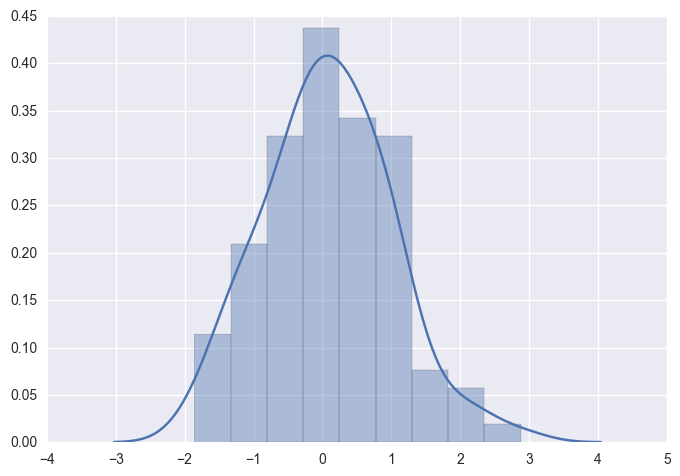

In [2]:
x = np.random.normal(size=100)
sns.distplot(x);

#### 1.1 直方图（Histograms）

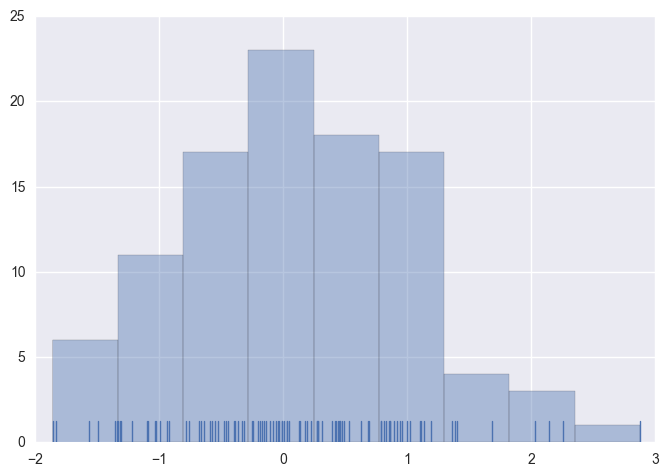

In [3]:
sns.distplot(x, kde=False, rug=True); 
# remove the density curve and add a rug plot, which draws a small vertical tick at each observation

- 主要参数是bins 的数量和位置。distplot()会自动选择合适的数量，不过尝试不同的数量可能发现数据的不同特征
> - When drawing histograms, the main choice you have is the number of bins to use and where to place them. 
> - distplot() uses a simple rule to make a good guess for what the right number is by default, but trying more or fewer bins might reveal other features in the data

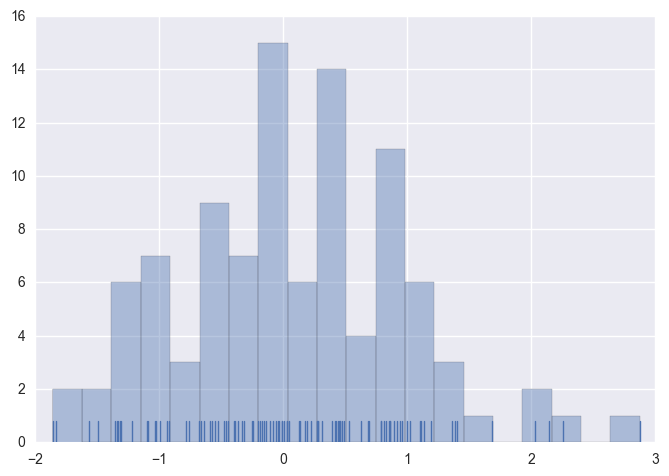

In [4]:
sns.distplot(x, bins=20, kde=False, rug=True);

#### 1.2 核密度估计（Kernel density estimaton）
- a useful tool for plotting the shape of a distribution

D:\software\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


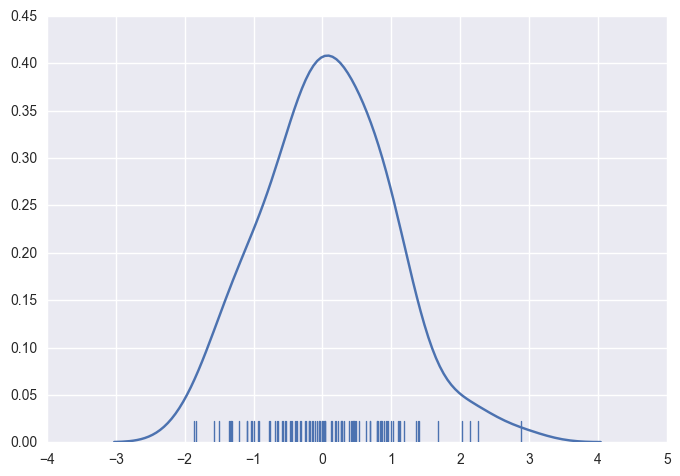

In [5]:
sns.distplot(x, hist=False, rug=True);

- KDE比直方图的计算量更大。首先会以某点为中心画正态分布曲线
> - Drawing a KDE is more computationally involved than drawing a histogram. 
> - What happens is that each observation is first replaced with a normal (Gaussian) curve centered at that value:

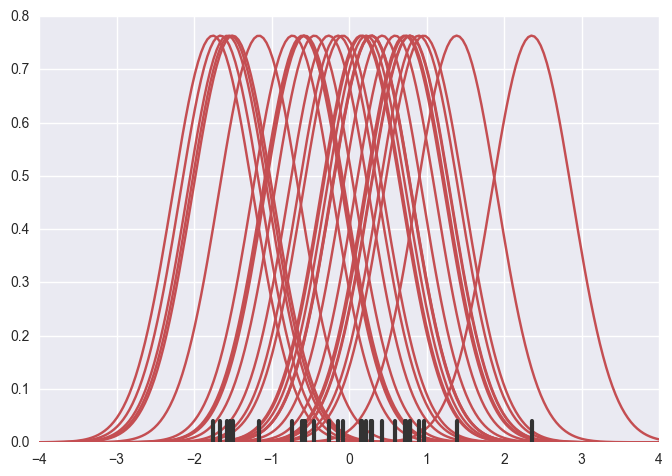

In [6]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

- 然后，相加这些曲线以计算每个点的密度值
> - Next, these curves are summed to compute the value of the density at each point in the support grid. 
> - The resulting curve is then normalized so that the area under it is equal to 1:

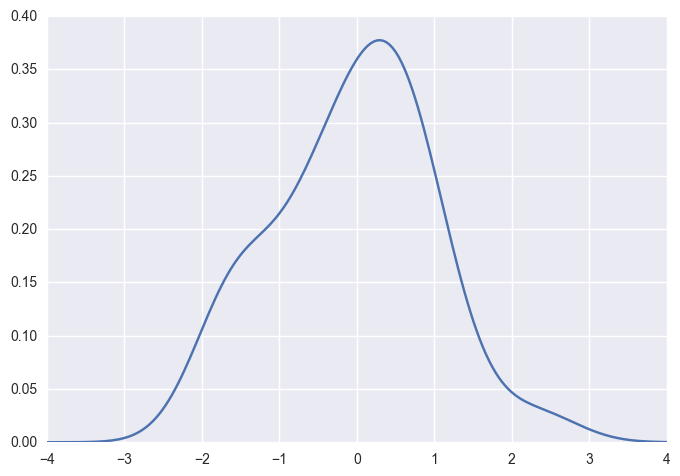

In [7]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

D:\software\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


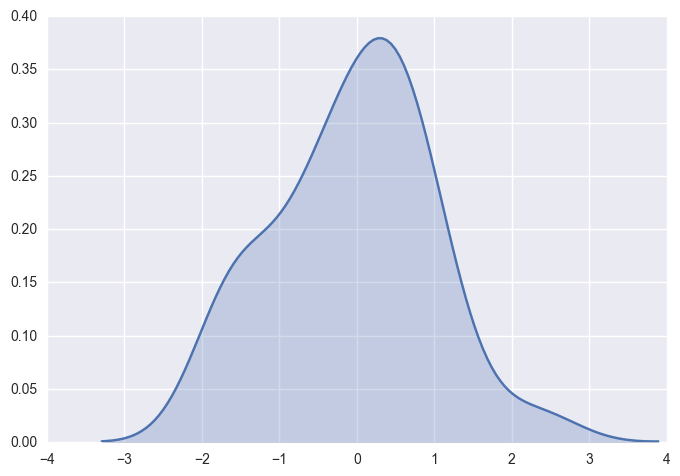

In [8]:
sns.kdeplot(x, shade=True); # sns 中画图

- 参数bw控制拟合数据时的密集程度，它相当于上面图中核的宽度。默认会自动估计合适的，但也可以尝试不同的值：
> - The bandwidth (bw) parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. 
> - It corresponds to the width of the kernels we plotted above. 
> - The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values:

D:\software\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


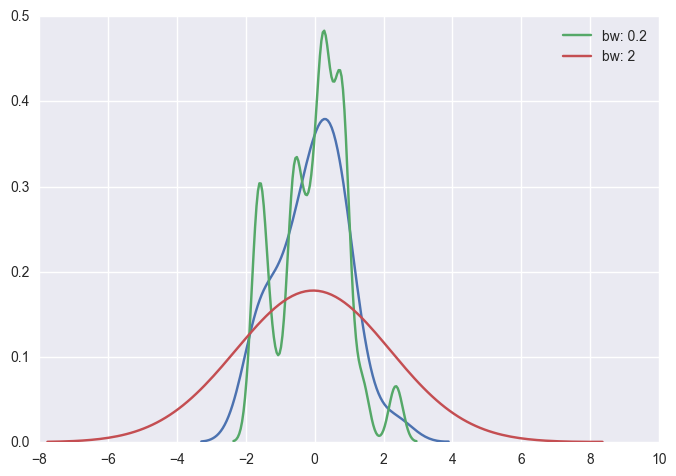

In [9]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

D:\software\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


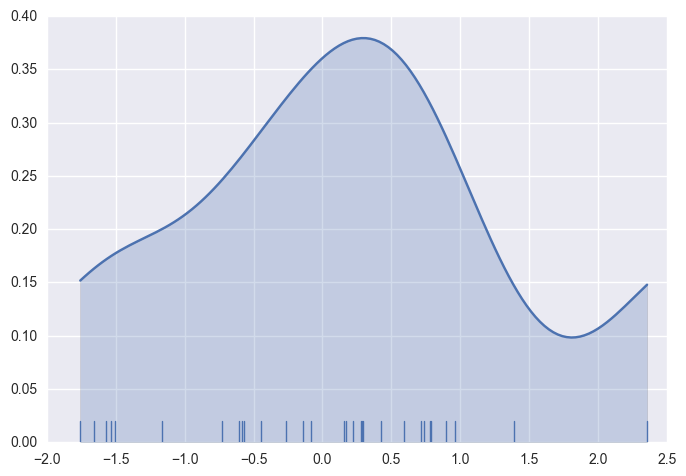

In [10]:
# It’s possible to control how far past the extreme values the curve is drawn with the cut parameter; 
# however, this only influences how the curve is drawn and not how it is fit:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

#### 1.3 拟合参数估计（Fitting parametric distributions）
- 使用（特定）参数分布拟合数据
> -  fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data:

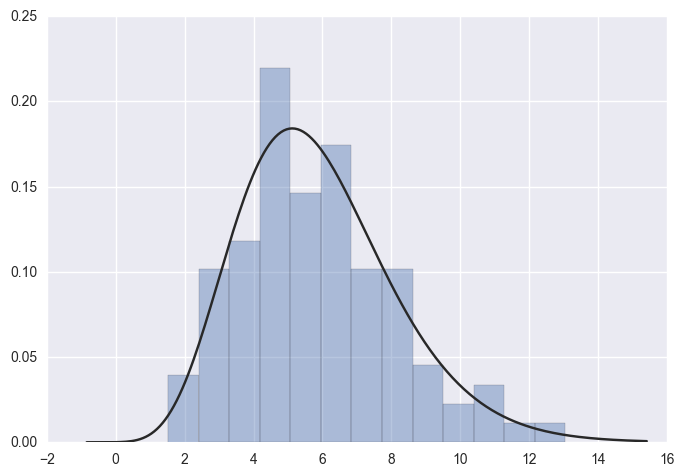

In [11]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

### 2 绘制双变量分布（Plotting bivariate distributions）
- jointplot()函数。绘制多面板图形，能够显示双变量（或联合变量）的关系
> -  the jointplot() function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

In [12]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

#### 1.1 散点图（Scatterplots）
- You can draw a scatterplot with the matplotlib plt.scatter function, and it is also the default kind of plot shown by the jointplot() function:

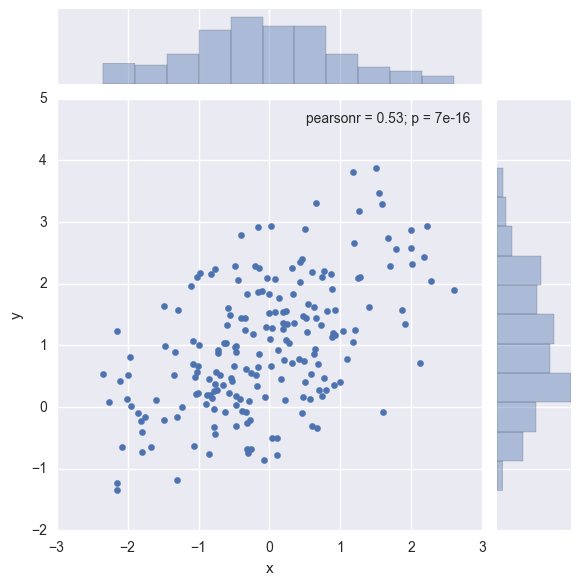

In [13]:
sns.jointplot(x="x", y="y", data=df);

#### 1.2 六边形图（Hexbin plots）
- 对相对比较大的数据有用
> -  The bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins. 
> -  This plot works best with relatively large datasets. 
> -  It’s availible through the matplotlib plt.hexbin function and as a style in jointplot().

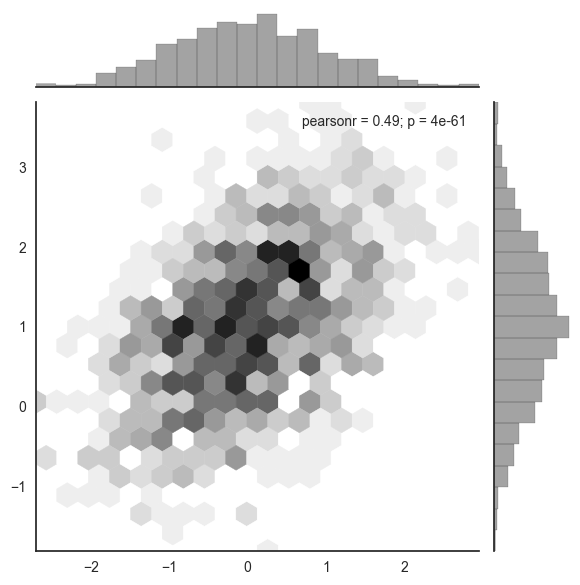

In [14]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

#### 1.3 核密度估计（Kernel density estimation）

D:\software\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


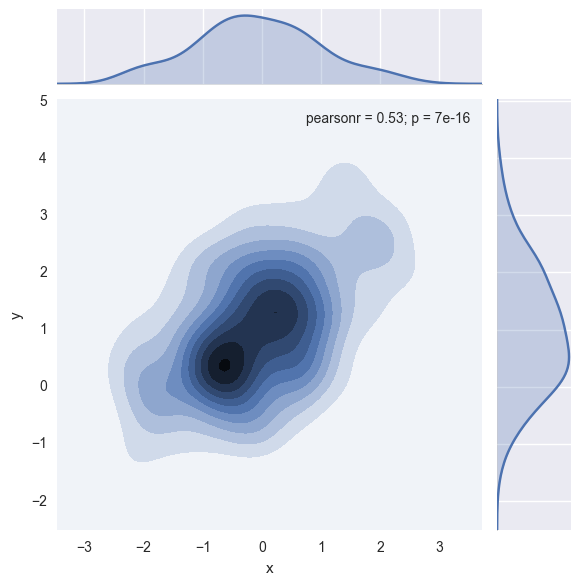

In [15]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

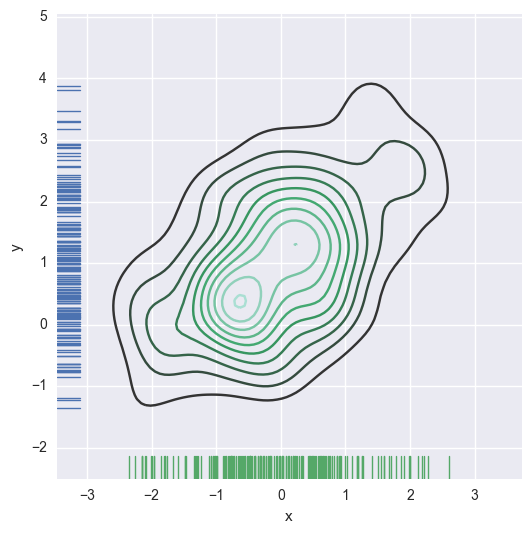

In [16]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

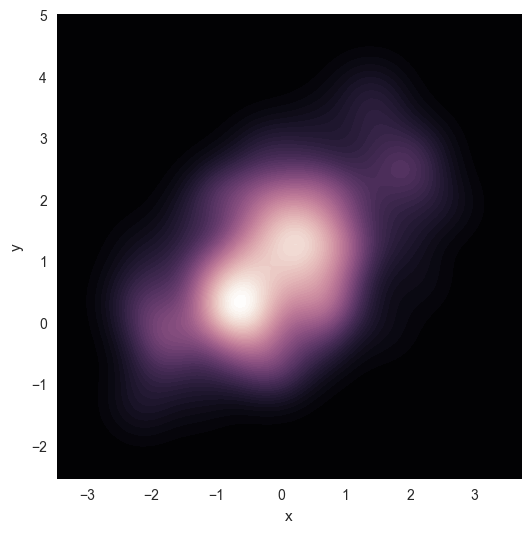

In [18]:
# 连续：If you wish to show the bivariate density more continuously, you can simply increase the number of contour levels:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

- 如果要更灵活得控制图形，可使用JointGrid直接绘图。这样就可以绘制多层或者进行旋转
> -  The jointplot() function uses a JointGrid to manage the figure. 
> -  For more flexibility, you may want to draw your figure by using JointGrid directly. 
> -  jointplot() returns the JointGrid object after plotting, which you can use to add more layers or to tweak other aspects of the visualization:

D:\software\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


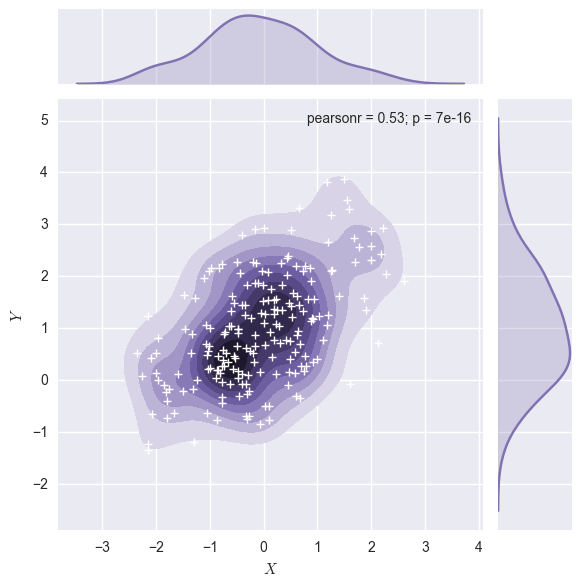

In [19]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

### 3 可视化数据的相互关系（Visualizing pairwise relationships in a dataset）
-  This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. 
-  by default, it also draws the univariate distribution of each variable on the diagonal Axes:

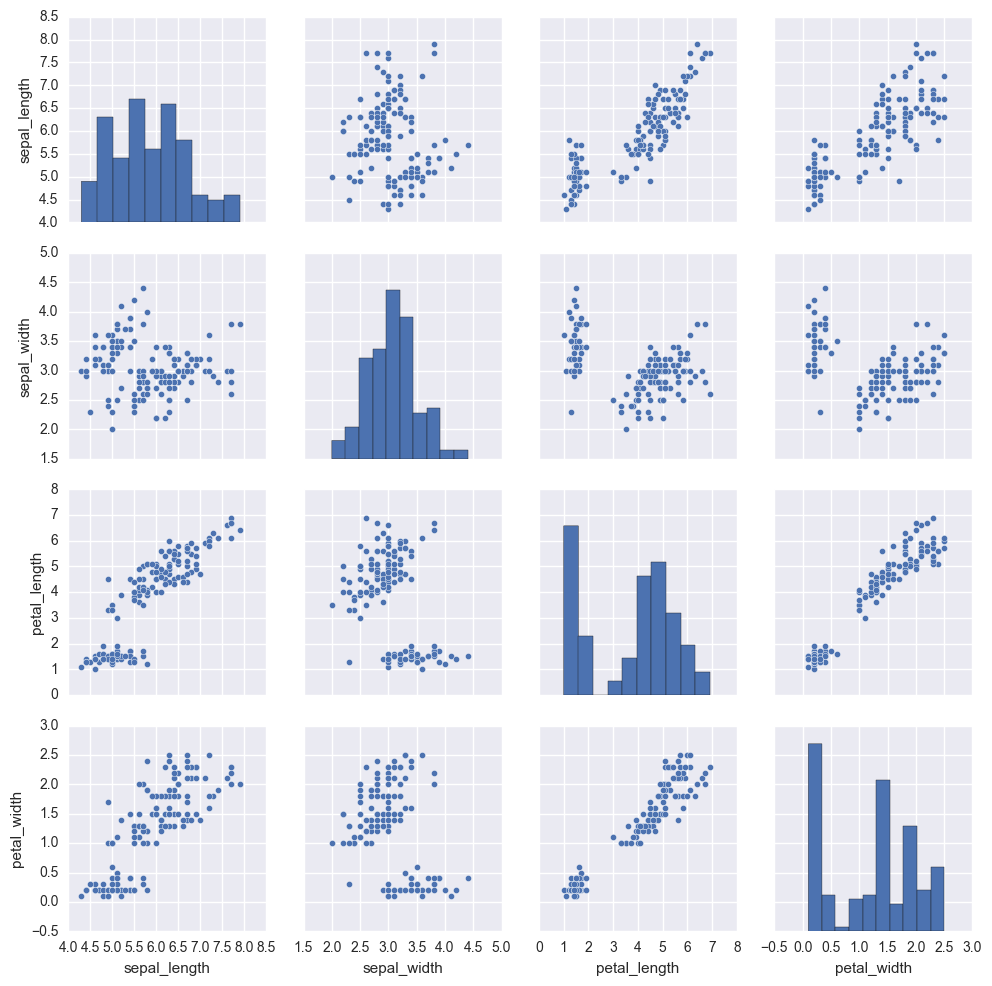

In [20]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

- Much like the relationship between jointplot() and JointGrid, the pairplot() function is built on top of a PairGrid object, which can be used directly for more flexibility:

D:\software\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
D:\software\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


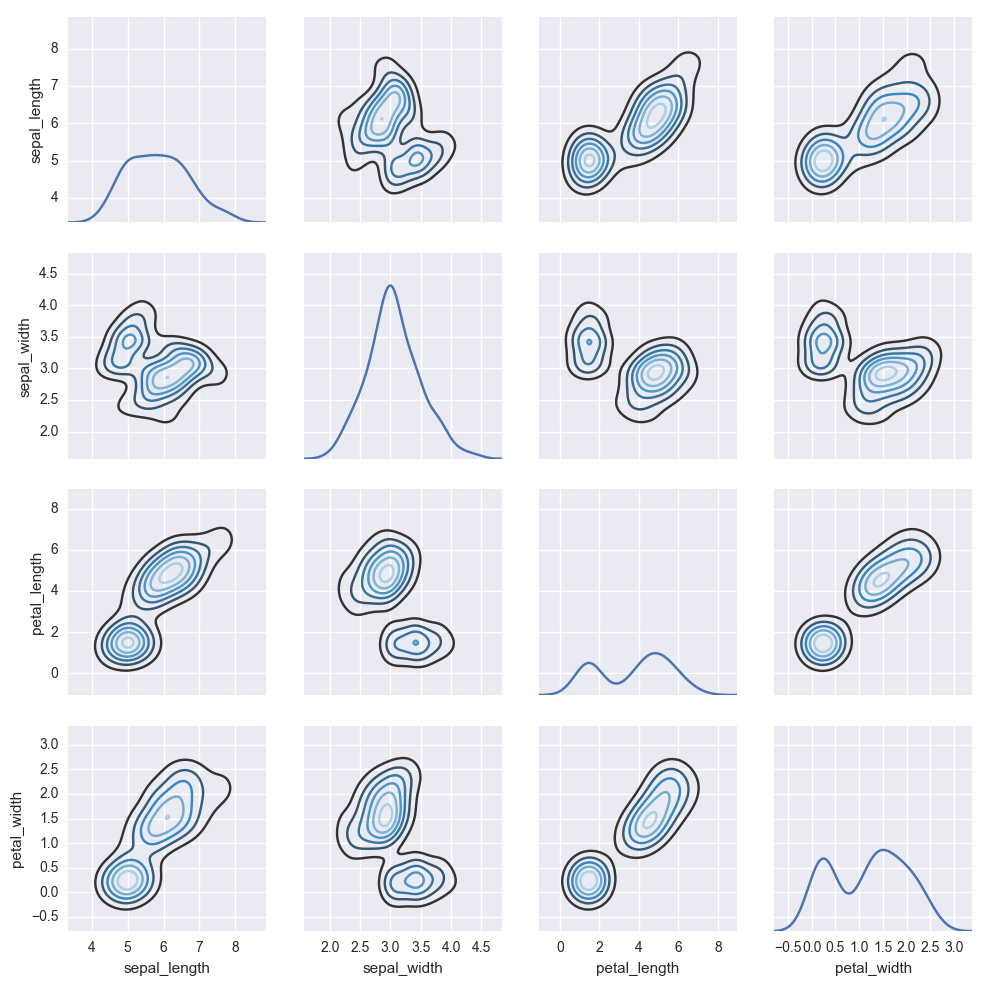

In [21]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

## 二、可视化线性关系（Visualizing linear relationships）

In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))

tips = sns.load_dataset("tips")

### 1 Functions to draw linear regression models
-  These functions, regplot() and lmplot() are closely related, and share much of their core functionality.
- In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:

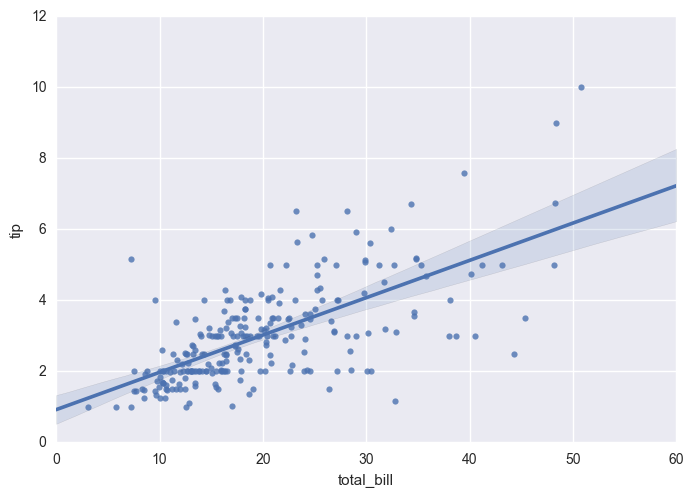

In [23]:
sns.regplot(x="total_bill", y="tip", data=tips);

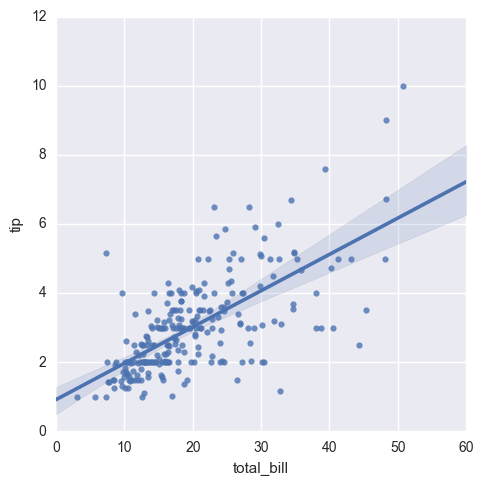

In [24]:
sns.lmplot(x="total_bill", y="tip", data=tips);

- 异同：1 上面两个图除了形状外一模一样。2 regplot()接受的数据格式比较广泛，包括simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data。3 lmplot()接受的数据格式是字符串，被称为“long-form” or “tidy” data。4 regplot()也使用lmplot()的一些子特征。

> -  You should note that the resulting plots are identical, except that the figure shapes are different. We will explain why this is shortly.
> -  For now, the other main difference to know about is that regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data. 
> -  In contrast, lmplot() has data as a required parameter and the x and y variables must be specified as strings. This data format is called “long-form” or “tidy” data. 
> -  Other than this input flexibility, regplot() possesses a subset of lmplot()‘s features, so we will demonstrate them using the latter.

- 当其中一个变量是离散值时，也可以绘制线性回归，但是这种简单的散点图并不典型
> -  It’s possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal:

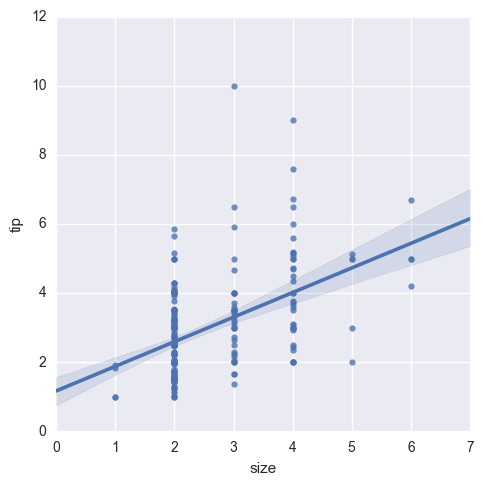

In [25]:
sns.lmplot(x="size", y="tip", data=tips);

- 一种方法是加jitter，但是仅用于散点图数据而且并不影响拟合的情况下
> -  One option is to add some random noise (“jitter”) to the discrete values to make the distribution of those values more clear. 
> -  Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself:

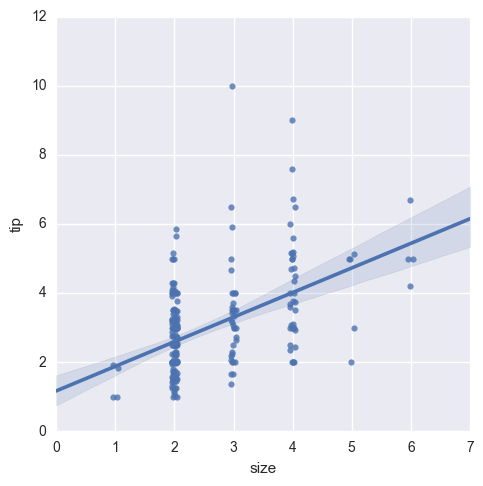

In [26]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

- 第二种方法是在离散点上聚合观测点以估计中心趋势
> -  A second option is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:

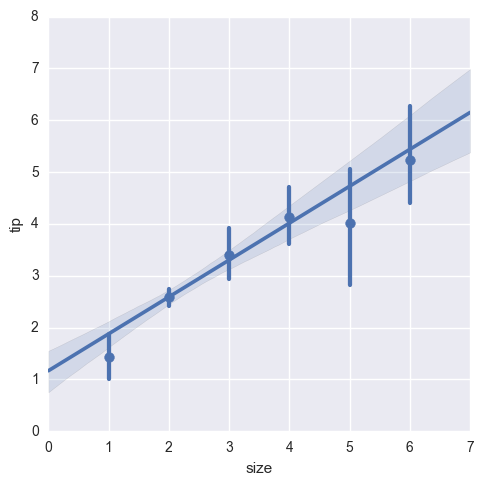

In [27]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

### 2 拟合不同种类的模型（Fitting different kinds of models）
- Anscombe’s quartet数据集
> -  The Anscombe’s quartet dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences. 
> -  For example, in the first case, the linear regression is a good model:

In [28]:
anscombe = sns.load_dataset("anscombe")

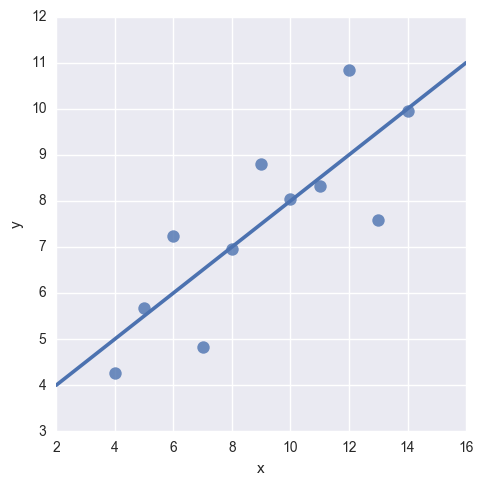

In [29]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

- 在第二个数据集中仍然是线性关系，但是线性模型拟合的并不好
> -  The linear relationship in the second dataset is the same, but the plot clearly shows that this is not a good model:

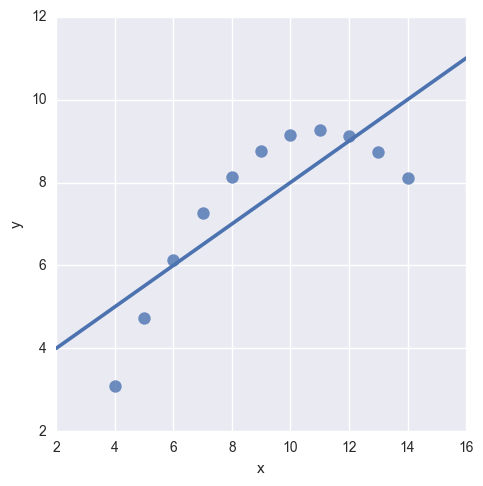

In [30]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

- lmplot() and regplot() 拟合多项式回归模型
> -  In the presence of these kind of higher-order relationships, lmplot() and regplot() can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

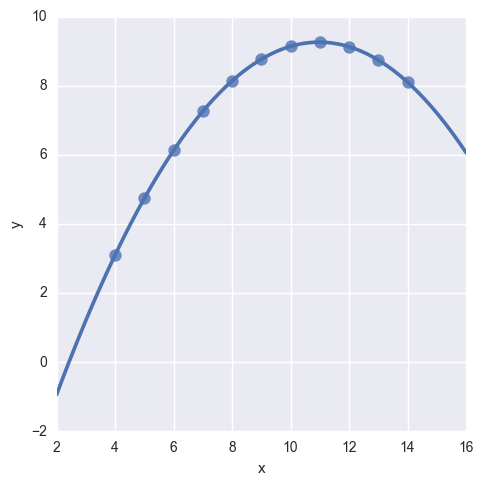

In [31]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

- 另一个问题是离群点
> -  A different problem is posed by “outlier” observations that deviate for some reason other than the main relationship under study:

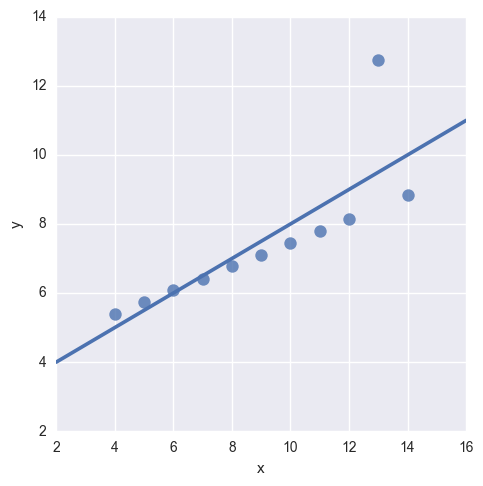

In [32]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

- 使用不同的损失函数以降低大的残差的权重
> -  In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

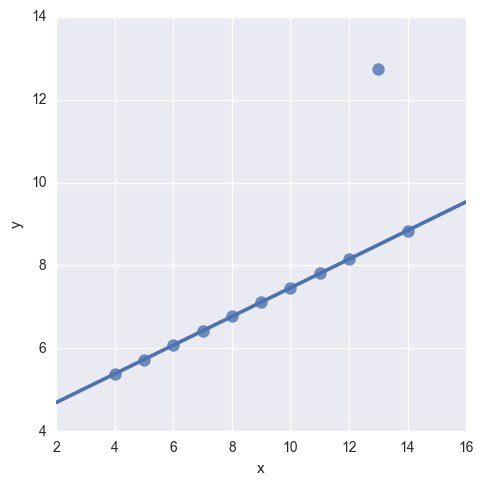

In [33]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

- 如果变量y是二元的
> -  When the y variable is binary, simple linear regression also “works” but provides implausible predictions:

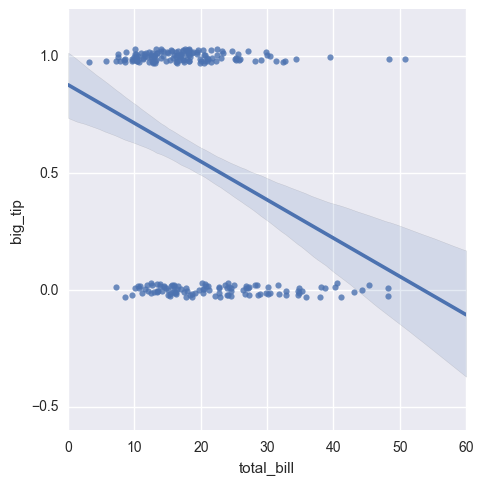

In [7]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips, y_jitter=.03);

- 拟合logistic regression
- 置信区间是由bootstrap程序算出，可有ci=None去除
> -  Note that the logistic regression estimate is considerably more computationally intensive (this is true of robust regression as well) than simple regression, and as the confidence interval around the regression line is computed using a bootstrap procedure, you may wish to turn this off for faster iteration (using ci=None).

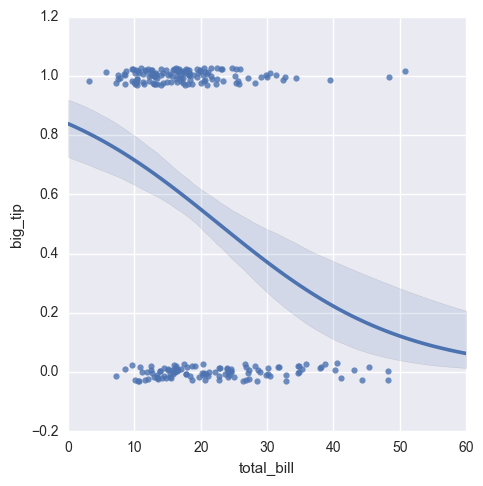

In [35]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,logistic=True, y_jitter=.03);

-  使用lowess smoother拟合非参数回归
> -  This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all

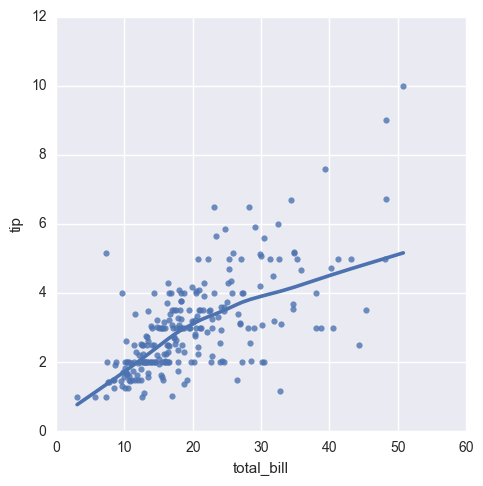

In [36]:
sns.lmplot(x="total_bill", y="tip", data=tips, lowess=True);

- residplot()函数检验简单的回归模型是否适合于数据。残差应该在y = 0附近随机。
> -  The residplot() function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. 
> -  It fits and removes a simple linear regression and then plots the residual values for each observation. 
> -  Ideally, these values should be randomly scattered around y = 0

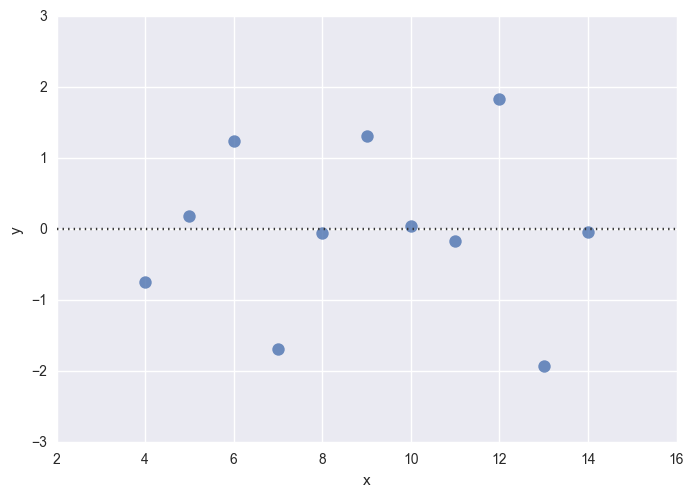

In [37]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),scatter_kws={"s": 80});

- 残差图中有规律，则简单线性回归不合适
> -  If there is structure in the residuals, it suggests that simple linear regression is not appropriate

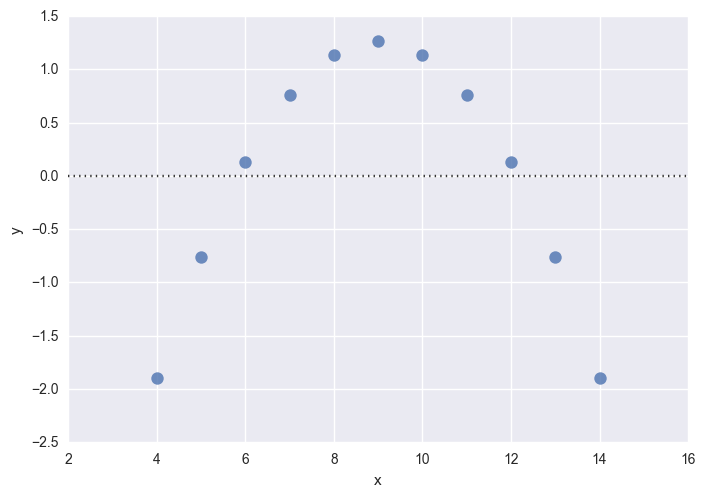

In [38]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

### 3 Conditioning on other variables
- how does the relationship between these two variables change as a function of a third variable?
- regplot() and lmplot()之间的区别。前者显示单一关系；后者可以探索三种类别变量。
> -  This is where the difference between regplot() and lmplot() appears. 
> -  While regplot() always shows a single relationsihp, lmplot() combines regplot() with FacetGrid to provide an easy interface to show a linear regression on “faceted” plots that allow you to explore interactions with up to three additional categorical variables.

- 最好的方式是在图上画出两种水平并用颜色做出区分
> -  The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them

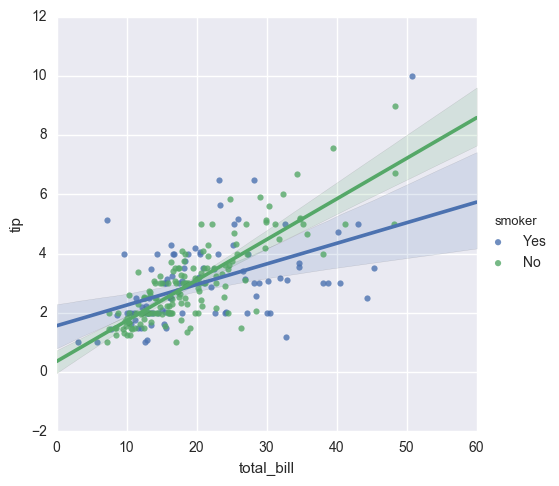

In [39]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

- 除了颜色，还可以通过散点的标记区分
> -  In addition to color, it’s possible to use different scatterplot markers to make plots the reproduce to black and white better. You also have full control over the colors used

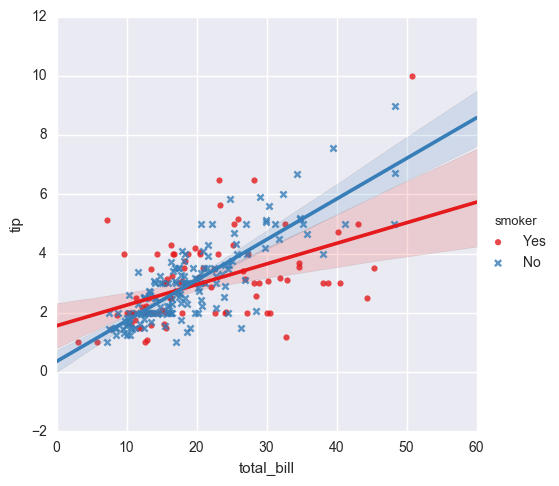

In [40]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

- 增加显示新的变量
> -  To add another variable, you can draw multiple “facets” which each level of the variable appearing in the rows or columns of the grid

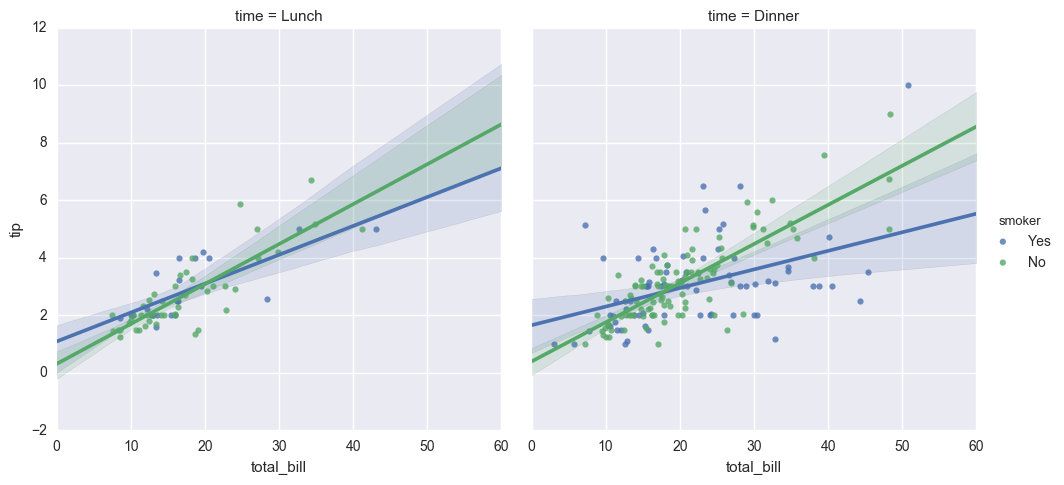

In [41]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

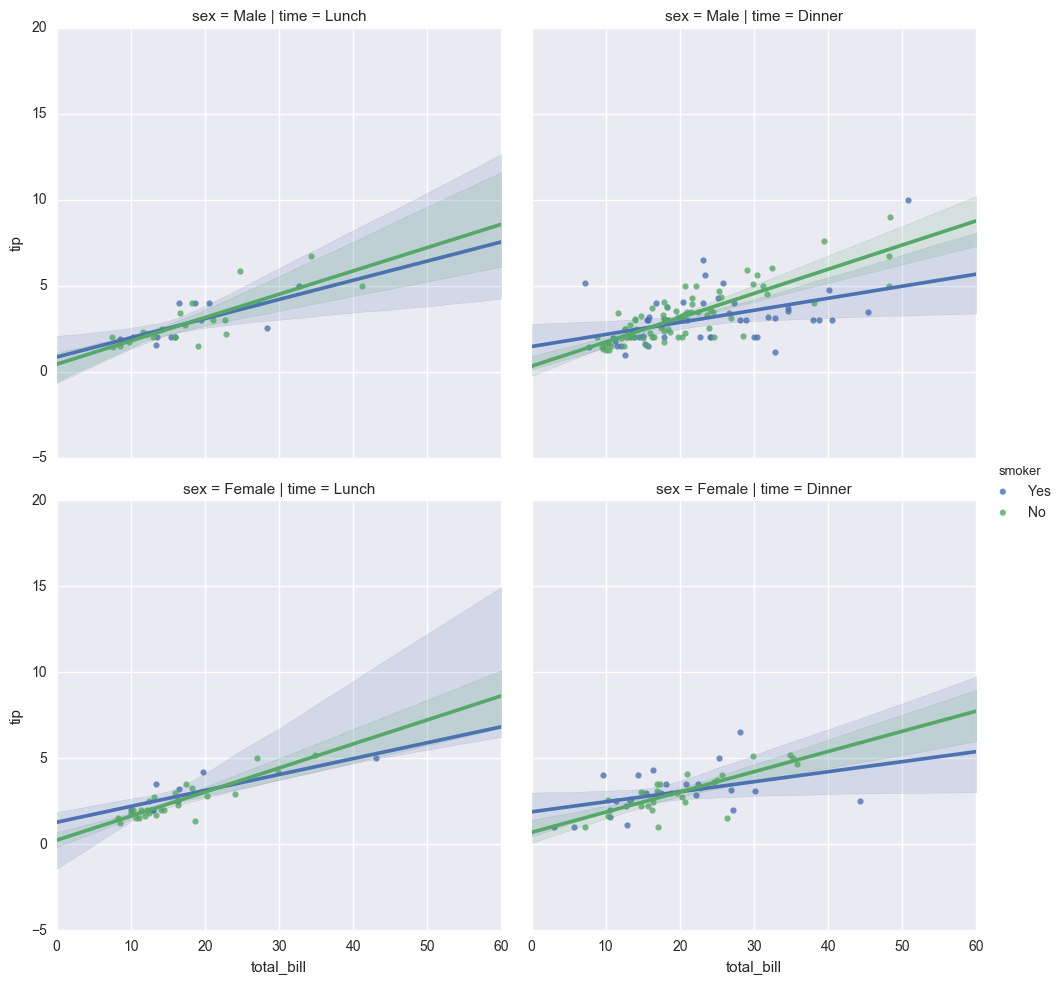

In [42]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

### 4 控制图形的大小和形状（Controlling the size and shape of the plot）
- regplot() and lmplot() 看起来一样，不过坐标轴的大小和形状不一样
> -  Before we noted that the default plots made by regplot() and lmplot() look the same but on axes that have a different size and shape. 
> -  This is because func:regplot is an “axes-level” function draws onto a specific axes. This means that you can make mutli-panel figures yourself and control exactly where the the regression plot goes. 
> -  If no axes is provided, it simply uses the “currently active” axes, which is why the default plot has the same size and shape as most other matplotlib functions. 
> -  To control the size, you need to create a figure object yourself.

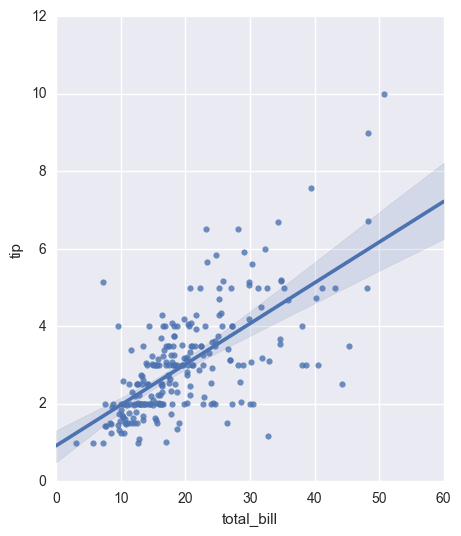

In [43]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

- lmplot()的形状和大小
> -  In contrast, the size and shape of the lmplot() figure is controlled through the FacetGrid interface using the size and aspect parameters, which apply to each facet in the plot, not to the overall figure itself

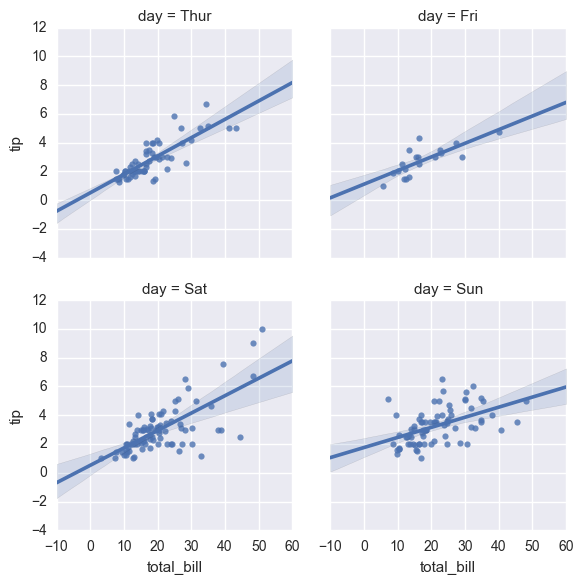

In [44]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=3);

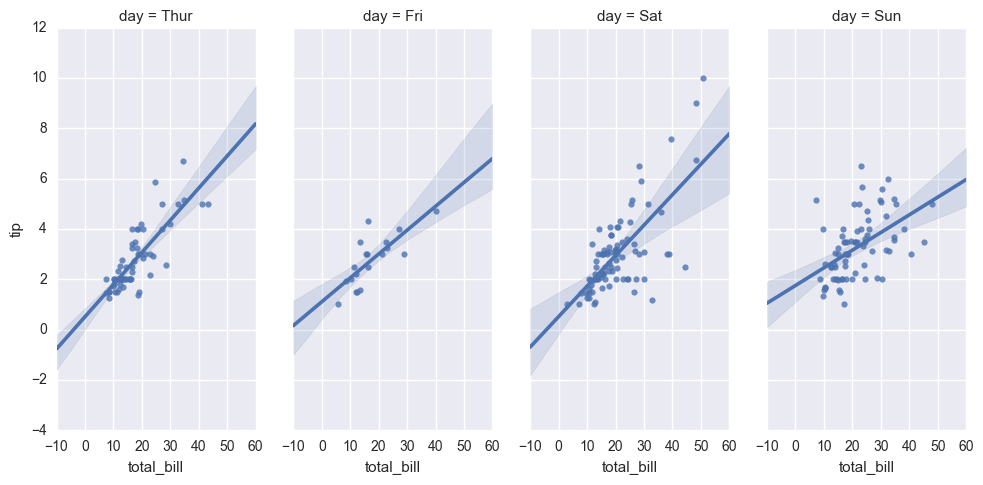

In [45]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

### 5 在其他情况下绘制回归线（Plotting a regression in other contexts）
- jointplot()通过传递参数kind="reg"调用regplot()绘制线性回归
> - A few other seaborn functions use regplot() in the context of a larger, more complex plot. 
> - The first is the jointplot() function that we introduced in the distributions tutorial. 
> - In addition to the plot styles previously discussed, jointplot() can use regplot() to show the linear regression fit on the joint axes by passing kind="reg"

D:\software\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


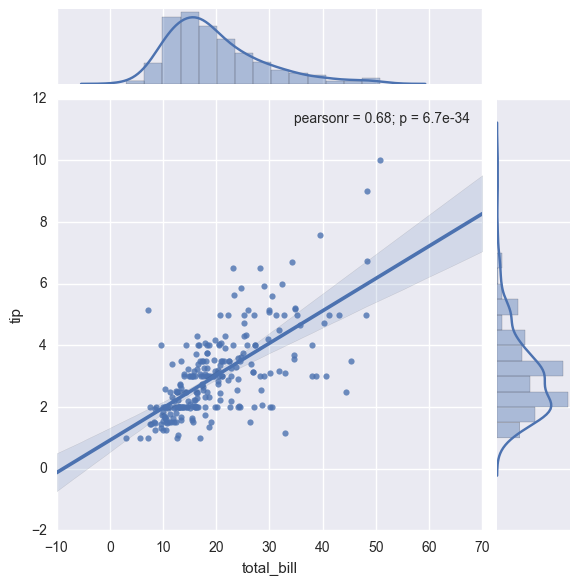

In [46]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

- pairplot() 通过参数kind="reg"结合调用regplot() and PairGrid 以显示变量间的线性关系。注意其与lmplot()的区别
> - Using the pairplot() function with kind="reg" combines regplot() and PairGrid to show the linear relationship between variables in a dataset. Take care to note how this is different from lmplot(). 
> - In the figure below, the two axes don’t show the same relationship conditioned on two levels of a third variable; rather, PairGrid() is used to show multiple relationships between different pairings of the variables in a dataset

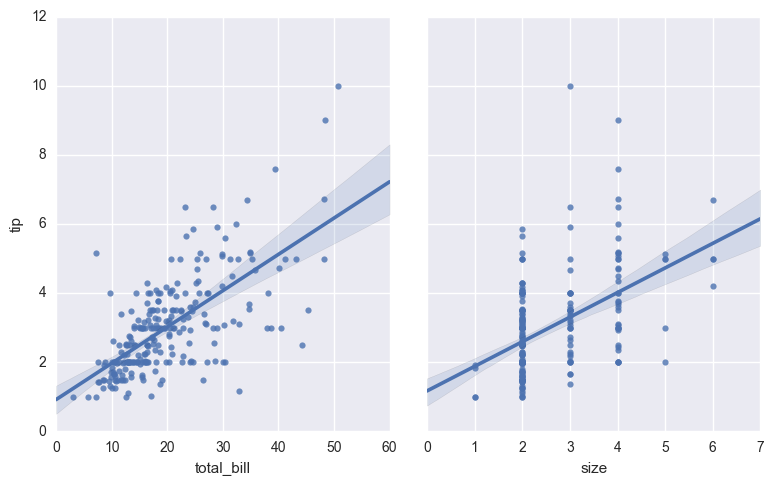

In [8]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=5, aspect=.8, kind="reg");

- pairplot()通过参数hue增加其他类别变量
> - Like lmplot(), but unlike jointplot(), conditioning on an additional categorical variable is built into pairplot() using the hue parameter

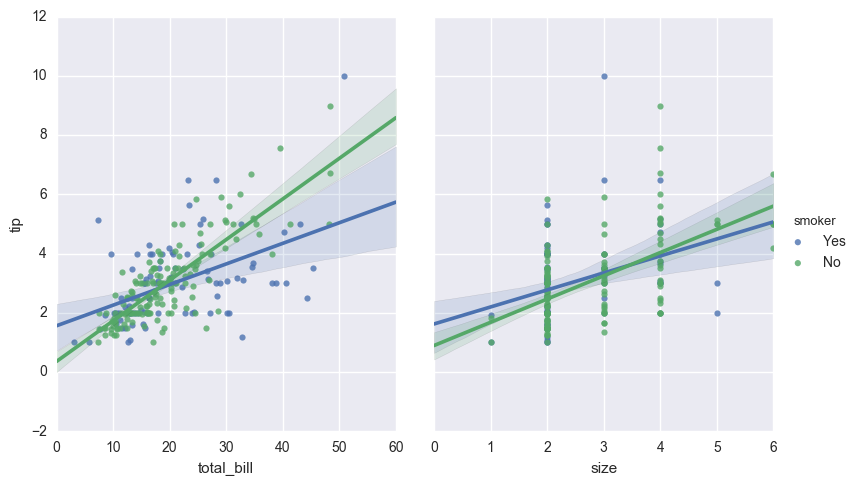

In [47]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=5, aspect=.8, kind="reg");

## 三、Plotting with categorical data
- what if one of the main variables you are interested in is categorical? In this case, the scatterplot and regression model approach won’t work. 
- seaborn的类别数据绘图被分为三部分：一是在类别变量中每一水平上显示每个样本swarmplot() and stripplot()，二是样本分布的抽象表征boxplot() and violinplot()，三是运用统计估计，包括测量中心趋势和置信区间barplot() and pointplot()。
> - It’s useful to divide seaborn’s categorical plots into three groups: those that show each observation at each level of the categorical variable, those that show an abstract representation of each distribution of observations, and those that apply a statistical estimation to show a measure of central tendency and confidence interval. 
> - The first includes the functions swarmplot() and stripplot(), the second includes boxplot() and violinplot(), and the third includes barplot() and pointplot(). 
> - These functions all share a basic API for how they accept data, although each has specific parameters that control the particulars of the visualization that is applied to that data.

In [48]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

### 1 Categorical scatterplots


- 显示类别变量不同水平的定量数据，带状绘图stripplot()
> - A simple way to show the the values of some quantitative variable across the levels of a categorical variable uses stripplot(), which generalizes a scatterplot to the case where one of the variables is categorical

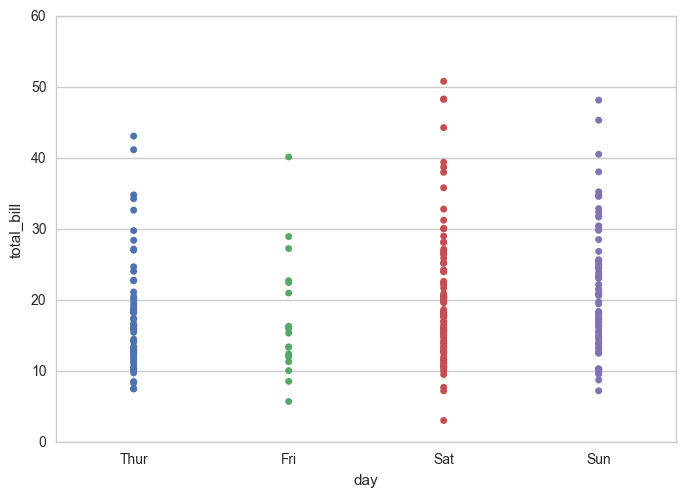

In [49]:
sns.stripplot(x="day", y="total_bill", data=tips);

- 带状图中，散点容易互相覆盖，因而不容易看到数据的全部分布。一个解决办法是沿类别轴调整位置，通过使用随机jitter
> - In a strip plot, the scatterplot points will usually overlap. This makes it difficult to see the full distribution of data. One easy solution is to adjust the positions (only along the categorical axis) using some random “jitter”

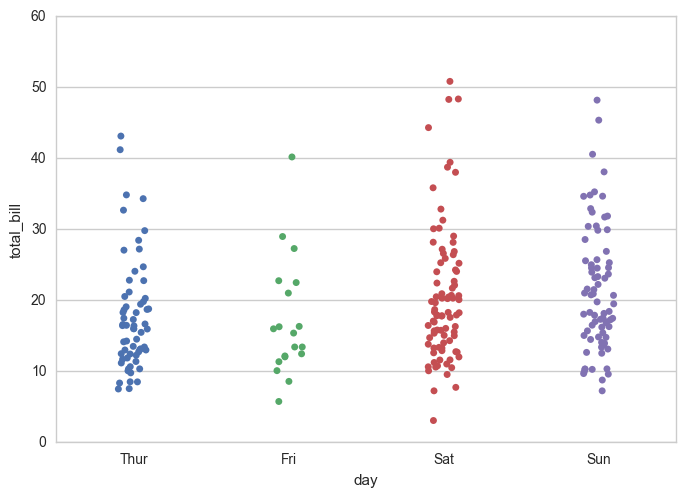

In [50]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

- 另一个方法是使用函数swarmplot()，它会通过算法重新沿类别轴放置散点
> - A different approach would be to use the function swarmplot(), which positions each scatterplot point on the categorical axis with an algorithm that avoids overlapping points

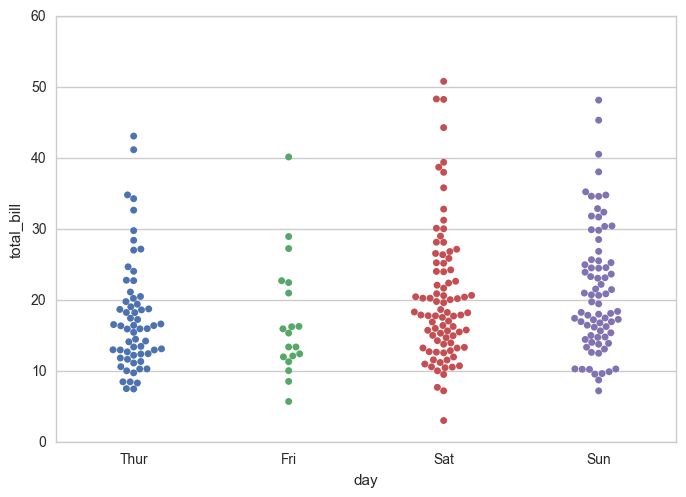

In [51]:
sns.swarmplot(x="day", y="total_bill", data=tips);

- 通过参数hue增加新的类别变量
> - It’s also possible to add a nested categorical variable with the hue parameter. Above the color and position on the categorical axis are redundant, but now each provides information about one of the two variables

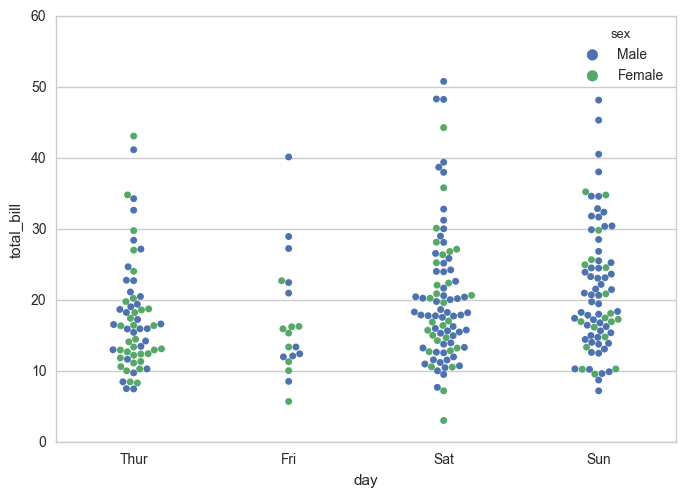

In [52]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

- 类别排列顺序：默认自动推测，但是pandas的类别数据类型，则可指定；DataFrame格式则按出现顺序显示
> - In general, the seaborn categorical plotting functions try to infer the order of categories from the data. 
> - If your data have a pandas Categorical datatype, then the default order of the categories can be set there. > > - For other datatypes, string-typed categories will be plotted in the order they appear in the DataFrame, but categories that look numerical will be sorted

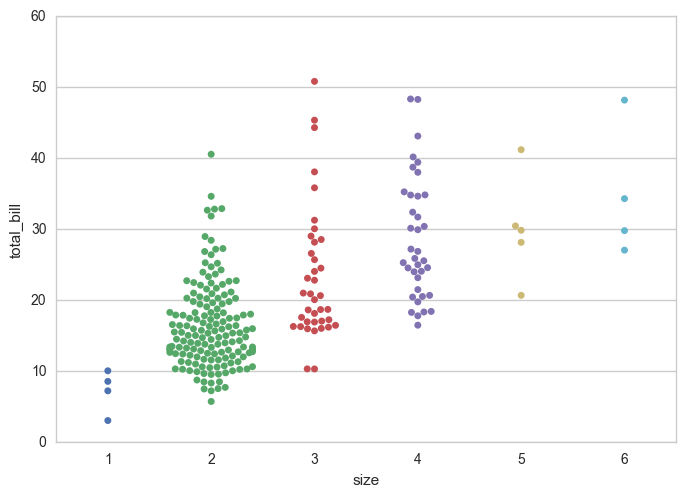

In [53]:
sns.swarmplot(x="size", y="total_bill", data=tips);

- 可以指定图形的方向，不过默认会通过传入数据的类型推测
> - With these plots, it’s often helpful to put the categorical variable on the vertical axis (this is particularly useful when the category names are relatively long or there are many categories). 
> - You can force an orientation using the orient keyword, but usually plot orientation can be inferred from the datatypes of the variables passed to x and/or y

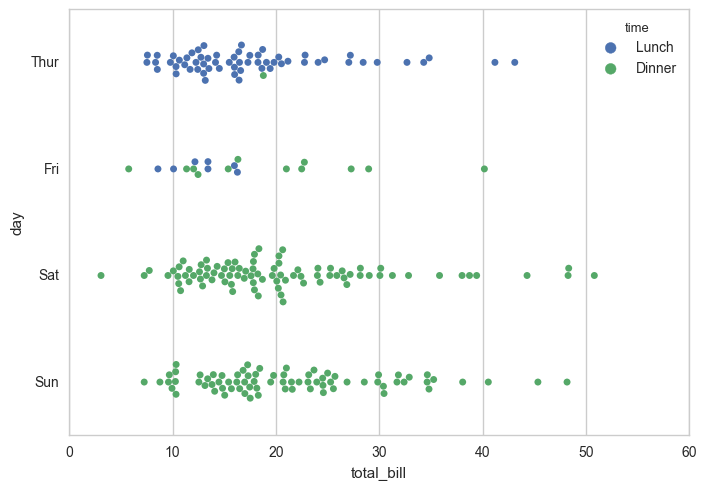

In [54]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

### 2 类别样本的分布（Distributions of observations within categories）

#### 2.1 箱型图（Boxplots）
- This kind of plot shows the three quartile values of the distribution along with extreme values. 
- The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. 
- Importantly, this means that each value in the boxplot corresponds to an actual observation in the data:

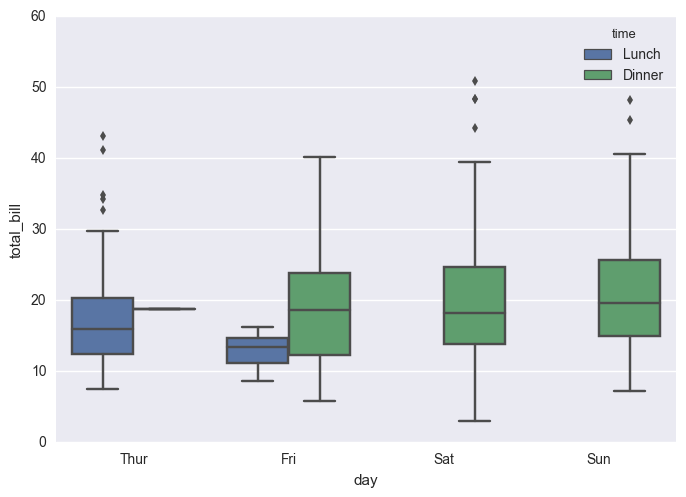

In [9]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

#### 2.2 小提琴图（Violinplots）
- combines a boxplot with the kernel density estimation procedure described in the distributions tutorial

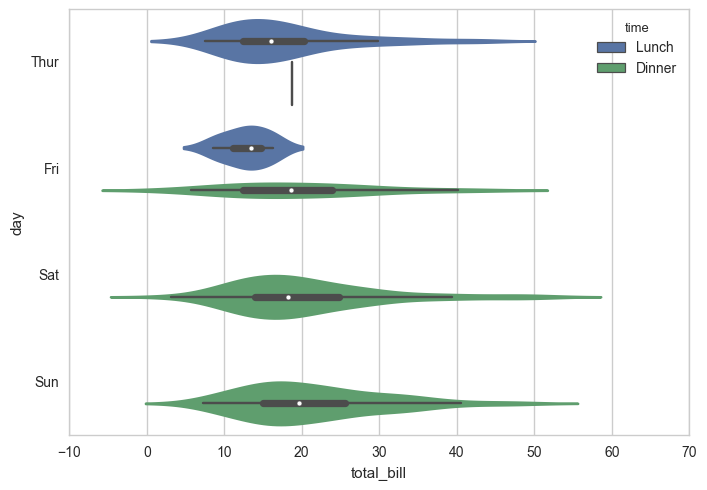

In [55]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

- 这种方法使用核密度估计，能够对数据分布提供更好的描述。相比于boxplot，需要使用更多的参数
> - This approach uses the kernel density estimate to provide a better description of the distribution of values. > - Additionally, the quartile and whikser values from the boxplot are shown inside the violin. 
> - Because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot

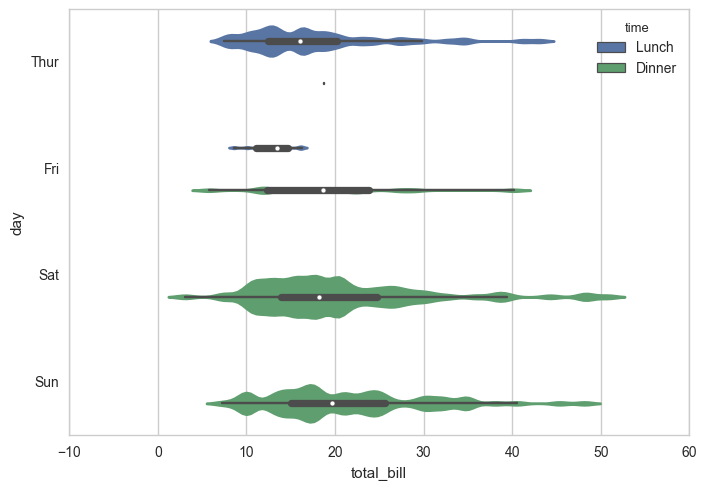

In [56]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips,
               bw=.1, scale="count", scale_hue=False);

- 当hue参数只有两个水平时，能够分割小提琴
> - It’s also possible to “split” the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:

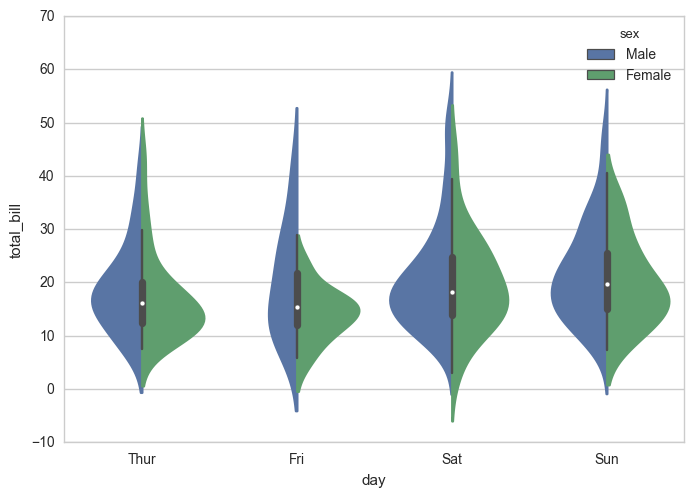

In [57]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

- 可以改变小提琴内显示的内容，如显示每个样本
> - Finally, there are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values

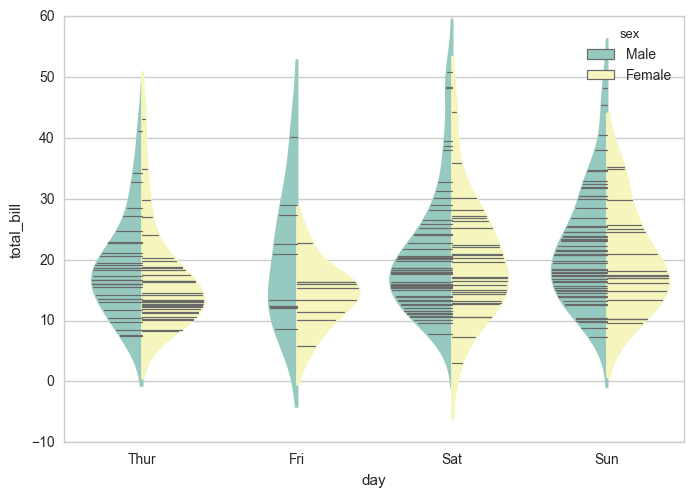

In [58]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, inner="stick", palette="Set3");

- 结合使用以显示每个样本及其分布 combine swarmplot() or swarmplot() with violinplot() or boxplot()
> - It can also be useful to combine swarmplot() or swarmplot() with violinplot() or boxplot() to show each observation along with a summary of the distribution

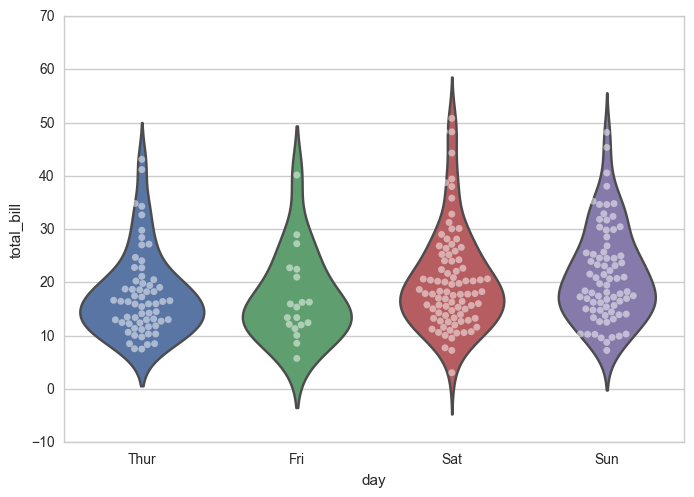

In [59]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5);

### 3 统计估计（Statistical estimation within categories）

#### 3.1 条形图（Bar plots）
- 可以显示各种估计，默认为均值。误差线是由bootstrapping计算的置信区间
> - the barplot() function operates on a full dataset and shows an arbitrary estimate, using the mean by default. > - When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars

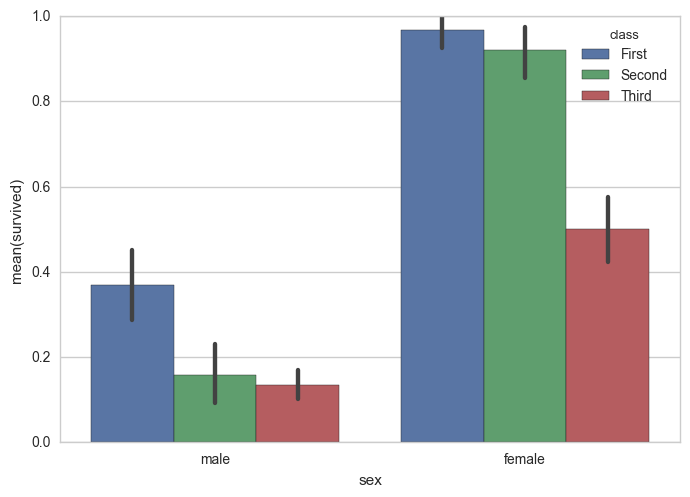

In [60]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

- 显示每类的样本数countplot()
> - A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. 
> - This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function

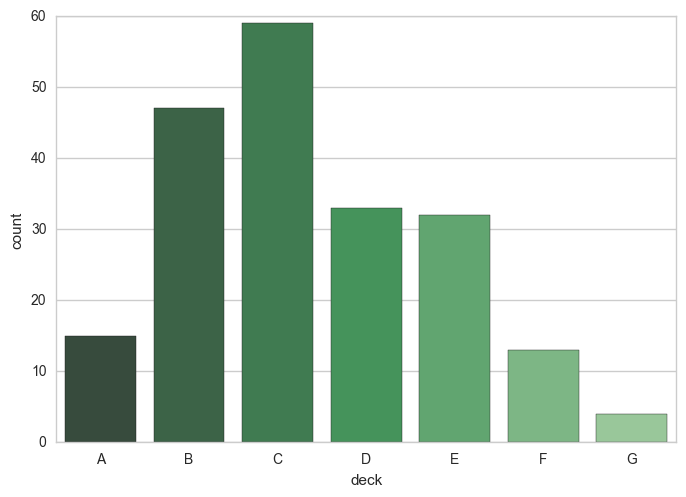

In [61]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");

- 适用于barplot() and countplot()的操作包括上面提到的所有（本节）
> - Both barplot() and countplot() can be invoked with all of the options discussed above, along with others that are demonstrated in the detailed documentation for each function

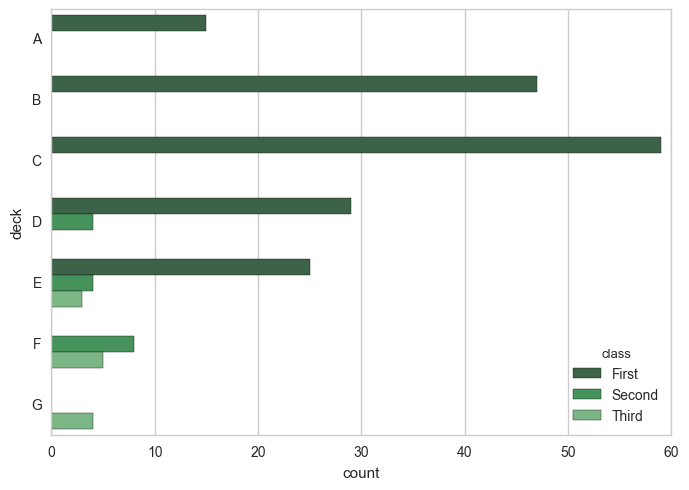

In [62]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d");

#### 3.2 点图（Point plots）
- This function also encodes the value of the estimate with height on the other axis, but rather than show a full bar it just plots the point estimate and confidence interval. 
- Additionally, pointplot connects points from the same hue category. 
- This makes it easy to see how the main relationship is changing as a function of a second variable, because your eyes are quite good at picking up on differences of slopes

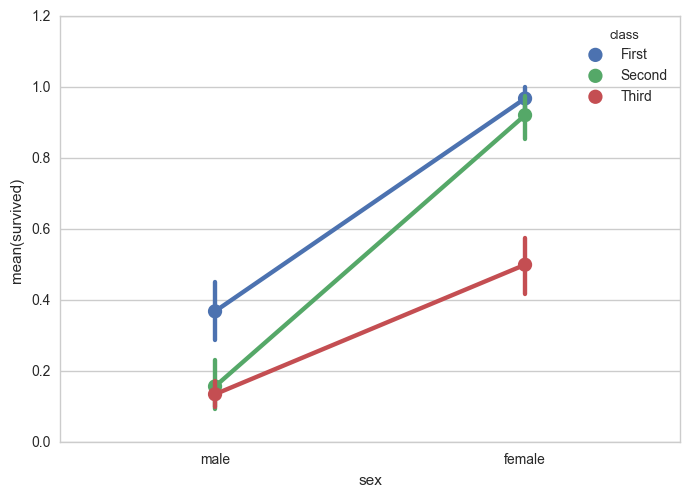

In [63]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

- 调整显示的标记和线型
> - To make figures that reproduce well in black and white, it can be good to use different markers and line styles for the levels of the hue category

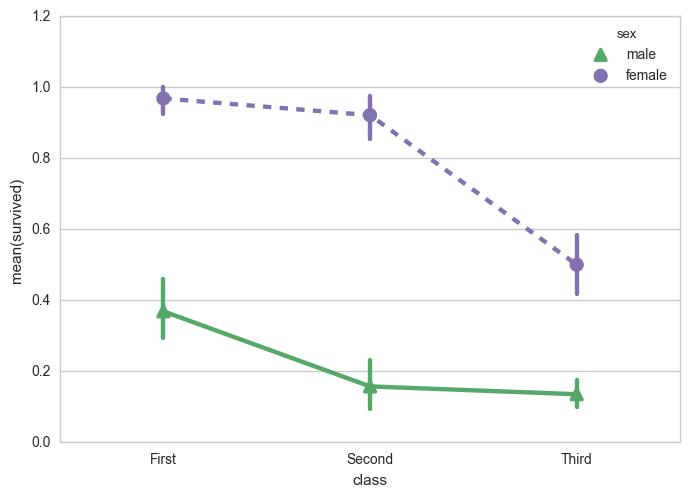

In [64]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

### 4 Plotting “wide-form” data
- 传入其他格式的数据给参数data绘图，包括pandas DataFrames or two-dimensional numpy arrays
> - While using “long-form” or “tidy” data is preferred, these functions can also by applied to “wide-form” data in a variety of formats, including pandas DataFrames or two-dimensional numpy arrays. 
> - These objects should be passed directly to the data parameter

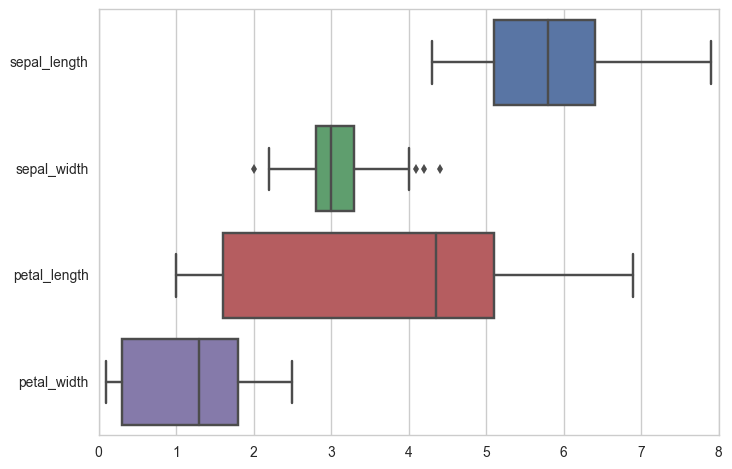

In [65]:
sns.boxplot(data=iris, orient="h");

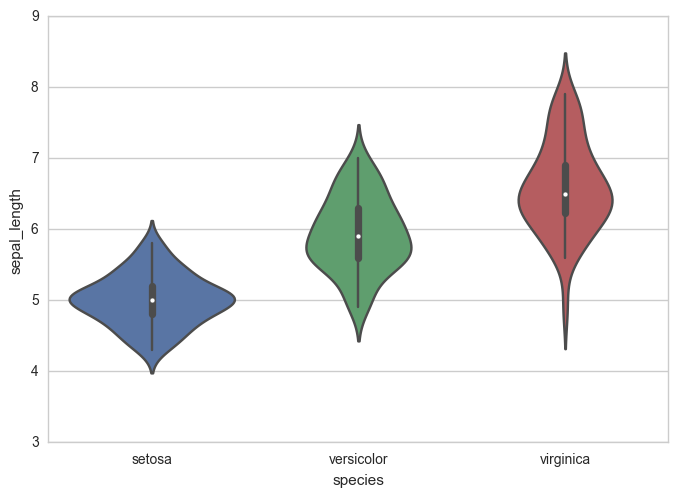

In [66]:
# Additionally, these functions accept vectors of Pandas or numpy objects rather than variables in a DataFrame
sns.violinplot(x=iris.species, y=iris.sepal_length);

- 需用matplotlib commands控制图形的大小和形状
> - To control the size and shape of plots made by the functions discussed above, you must set up the figure yourself using matplotlib commands. 
> - Of course, this also means that the plots can happily coexist in a multi-panel figure with other kinds of plots

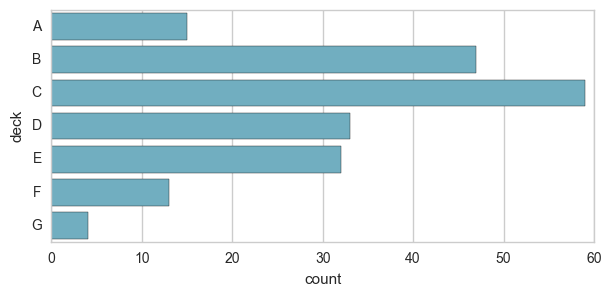

In [67]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

### 4 Drawing multi-panel categorical plots
- you can either use the functions introduced above, or the higher-level function factorplot(), which combines these functions with a FacetGrid() to add the ability to examine additional categories through the larger structure of the figure. 
- By default, factorplot() produces a pairplot()

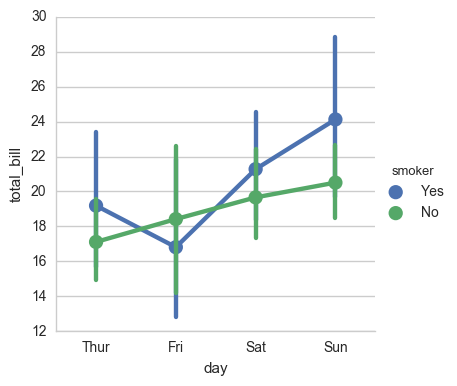

In [68]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips);

- 使用参数kind，选择所需绘制的图形
> - the kind parameter lets you chose any of the kinds of plots discussed above

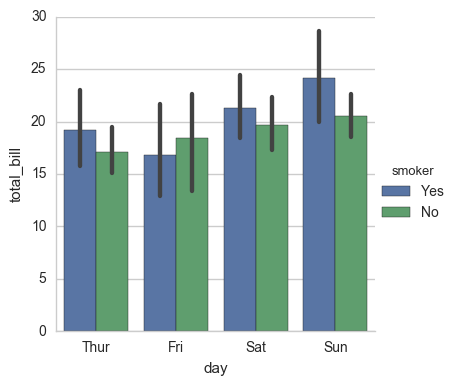

In [69]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar");

- factorplot()函数最大的优势在于很容易绘制各部分图形，以探索其他类别变量的作用
> - The main advantage of using a factorplot() is that it is very easy to “facet” the plot and investigate the role of other categorical variables

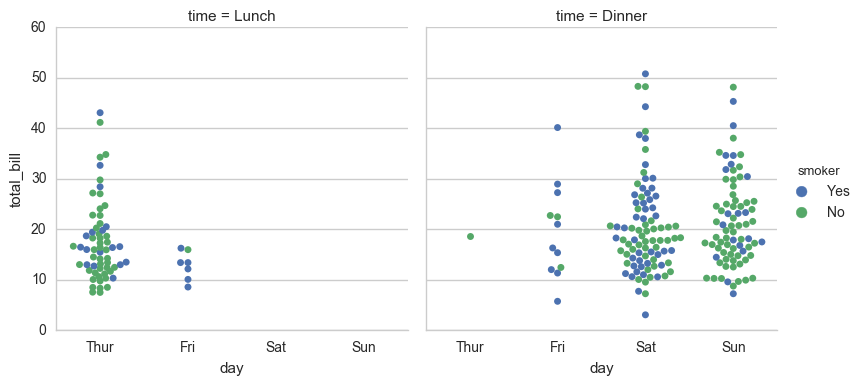

In [70]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm");

- 可以绘制各种图形，并调整大小和形状
> - Any kind of plot can be drawn. Because of the way FacetGrid works, to change the size and shape of the figure you need to specify the size and aspect arguments, which apply to each facet

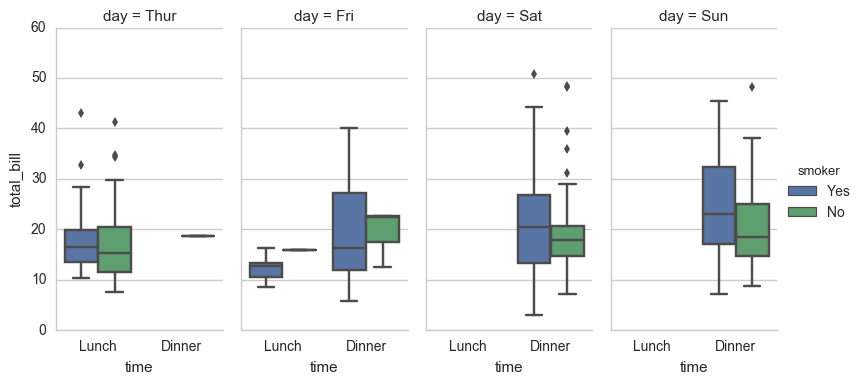

In [71]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);

- 可以使用boxplot() and FacetGrid直接绘图
> - It is important to note that you could also make this plot by using boxplot() and FacetGrid directly. 
> - However, special care must be taken to ensure that the order of the categorical variables is enforced in each facet, either by using data with a Categorical datatype or by passing order and hue_order

- 能在更复杂的场景中运用
> - Because of the generalized API of the categorical plots, they should be easy to apply to other more complex contexts. 
> - For example, they are easily combined with a PairGrid to show categorical relationships across several different variables

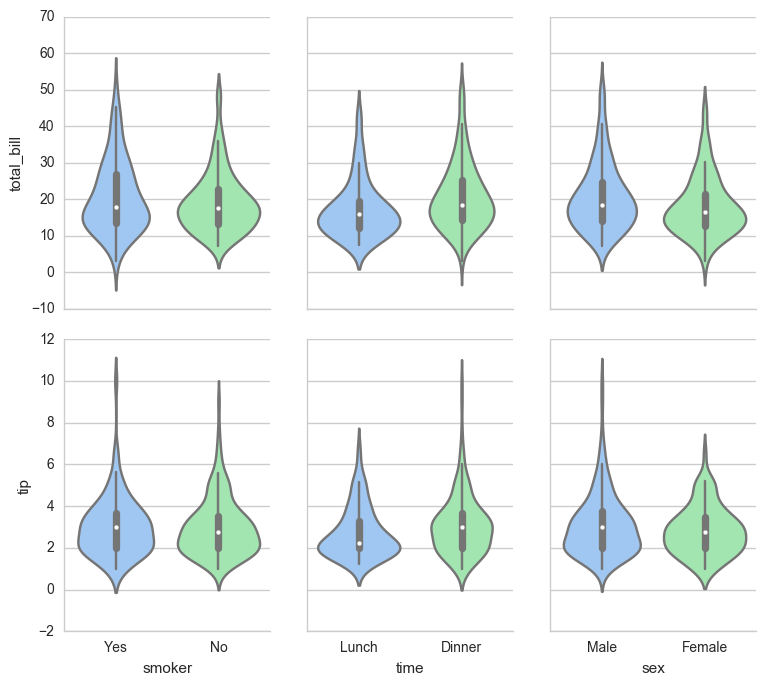

In [72]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");